In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

boston = datasets.load_boston()
X = boston['data']
y = boston['target']

c:\Users\nolas\OneDrive\Documents\Python\DS-from-Scratch\RegularizedRegression\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Al

## Fit Regularized

In [15]:
from MyRegularizedRegression import RegularizedRegression, BayesianRegression

# set lambda
lam = 10

# fit ridge
ridge_model = RegularizedRegression()
ridge_model.fit_ridge(X, y, lam)

# fit lasso
lasso_model = RegularizedRegression()
lasso_model.fit_lasso(X, y, lam)

## Fit Bayesian

In [17]:
sigma_squared = 11.8
tau = 10
model = BayesianRegression()
model.fit(X, y, sigma_squared, tau)

c:\Users\nolas\OneDrive\Documents\Python\DS-from-Scratch\RegularizedRegression\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\nolas\OneDrive\Documents\Python\DS-from-Scratch\RegularizedRegression\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\nolas\OneDrive\Documents\Python\DS-from-Scratch\RegularizedRegression\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid 

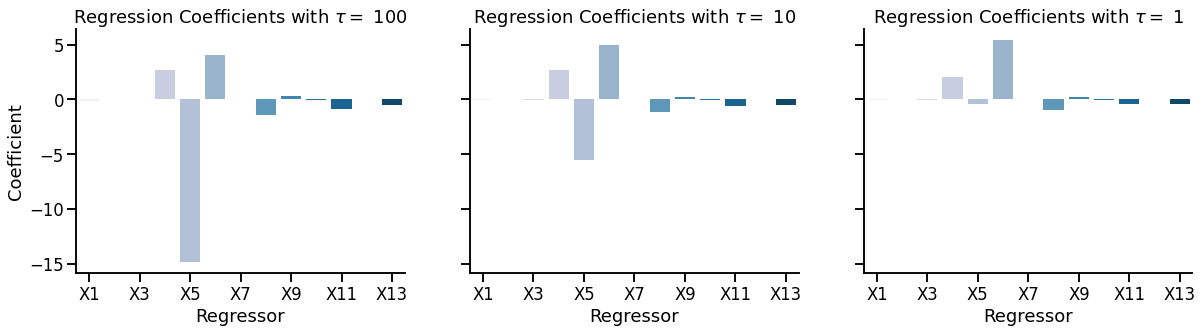

In [18]:
Xs = ['X'+str(i + 1) for i in range(X.shape[1])]
taus = [100, 10, 1]

fig, ax = plt.subplots(ncols = len(taus), figsize = (20, 4.5), sharey = True)
for i, tau in enumerate(taus):
    model = BayesianRegression()
    model.fit(X, y, sigma_squared, tau) 
    betas = model.beta_hats[1:]
    sns.barplot(Xs, betas, ax = ax[i], palette = 'PuBu')
    ax[i].set(xlabel = 'Regressor', title = fr'Regression Coefficients with $\tau = $ {tau}')
    ax[i].set(xticks = np.arange(0, len(Xs), 2), xticklabels = Xs[::2])

ax[0].set(ylabel = 'Coefficient')
sns.set_context("talk")
sns.despine()